In [7]:
datapath='../../features'
Flods=[0,1,2,3]
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
import os
print(os.getcwd())

/home/mingchen/Course/CS235/CS235Project/scripts


In [8]:
# Write your code to calculate the same here
def sigmoid(x):
    return 1/(1+np.exp(-x))
#print ((phi(trainX,False)).shape,trainY.shape)
def lrloss(w,X,Y,lmbda):
    ## !!Your code here!!
    loss=0
    for i in range(0,X.shape[0]):
        loss+=-np.log(sigmoid(Y[i]*X[i,:].dot(w))+0.0000000001)
    loss+=lmbda*sum(w[1:]**2)/2
    return loss

def lrgrad(w,X,Y,lmbda):
    ## !!Your code here!!
    
    ## compute P=X*w.*Y
    P=sigmoid(np.multiply(np.matmul(X,w),Y))
    
    ## grad=-X^T*((1-P).*Y)  (first part)
    grad=-np.matmul(X.T,np.multiply(1-P,Y))
    
    ## grad(1:end)+=\lambda*w(1:end)  (second part)
    grad[1:]+=lmbda*w[1:]
    
    return grad
    
def lrhess(w,X,Y,lmbda):
    ## !!Your code here!!
    
    ## compute P=X*w.*Y
    P=sigmoid(np.multiply(np.matmul(X,w),Y))
    
    ## R=p_i(1-p_i)
    R=np.diagflat(np.multiply(P,1-P))
    
    ## hessian=X^T*R*X  (first part)
    hess=np.matmul(X.T,np.matmul(R,X))
    
    ## hessian+=\lambda*I(I_{1,1}=0)   (second part)
    hess[1:,1:]+=lmbda*np.eye(w.shape[0]-1)
    
    return hess

In [10]:
# You should implement "newton" below
# However, as an example, here is gradient descent implemented with a constant step size
# (note: this is *not* a good implementation, but just to show the idea)
# The "ittfn" can help with debugging, but isn't necessary

# def graddesc(w,eta,fn,gradfn,ittfn=None):
#     oldf = fn(w)
#     df = 1
    
#     while(df>1e-6):
#         w = w - eta*gradfn(w)
#         newf = fn(w)
#         df = oldf-newf # hope to be positive, or we've over-shot and will be done
#         print(df)
#         if ittfn is not None:
#             ittfn(w,eta,newf)
#         oldf = newf
#     return w
def graddesc(w,eta,fn,gradfn, ittfn=None):
    oldf = fn(w)
    df = 1
    while(df>1e-6):
        g = gradfn(w)
        #eta=0.3
        while eta>1e-10:
            neww = w - eta*g
            newf = fn(neww)
            if oldf>newf*1.001:
                break
            eta *= 0.5
        if ittfn is not None:
            ittfn(w,eta,newf)
#         if eta<=1e-10:
#             break
        df=newf-oldf
        oldf = newf
        
        w = neww
    return w    
# You should write this function
# note, to find A^{-1}*b, use np.linalg.solve(A,b)
def newton(w,fn,gradfn,hessfn,ittfn=None):
    # !! Your Code Here !!
    oldf=fn(w)
    df=1
    step_size=1.0
    while(df>1e-6):
        neww = w - np.linalg.solve(hessfn(w),gradfn(w))
        newf = fn(neww)
        df=oldf-newf
        if df<=0:
            step_size*=2
            while(step_size>1e-10):
                neww = w - step_size*gradfn(w)
                newf=fn(neww)
                df=oldf-newf
                if df>1e-6:
                    break
                step_size/=2
        if df>0:
            w=neww
            oldf=newf 
        
    return w
def trainGraddesc(X,Y,lmbda,eta):
    w0 = np.zeros((X.shape[1],1))
    return graddesc(w0,eta,
                   lambda w :lrloss(w,X,Y,lmbda),
                   lambda w :lrgrad(w,X,Y,lmbda))
def trainlr(X,Y,lmbda):
    w0 = np.zeros((X.shape[1],1)) # starting w at zero works well for LR
    return newton(w0,lambda w : lrloss(w,X,Y,lmbda),
                  lambda w : lrgrad(w,X,Y,lmbda),
                  lambda w : lrhess(w,X,Y,lmbda))

def lrerrorrate(X,Y,w):
    return np.sum(Y*np.matmul(X,w)<=0)/Y.shape[0]

(18000, 55) (18000, 1)
(6000, 55) (6000, 1)
0.4086666666666667
0.3385
0.2778333333333333
0.23366666666666666
0.16466666666666666
0.15916666666666668
0.13683333333333333
0.1345
0.13616666666666666
0.13666666666666666
0.13633333333333333
0.1365
0.13733333333333334
0.13783333333333334
0.1375
0.13716666666666666
0.135
0.13183333333333333
0.14216666666666666
0.17616666666666667
0.19016666666666668


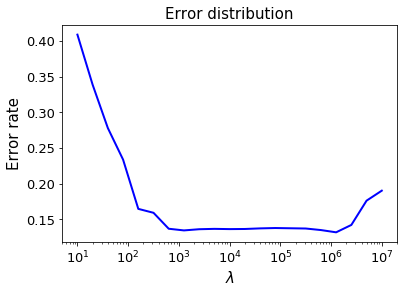

(18000, 55) (18000, 1)
(6000, 55) (6000, 1)
0.3435
0.3263333333333333
0.2956666666666667
0.233
0.1785
0.16516666666666666
0.15233333333333332
0.14866666666666667
0.14766666666666667
0.146
0.14533333333333334
0.145
0.14466666666666667
0.144
0.14266666666666666
0.141
0.13916666666666666
0.13766666666666666
0.146


KeyboardInterrupt: 

In [98]:
lmbdas=10**np.arange(1,7.1,0.3)
overall_err=[]
for flod in Flods:
    overall_err.append([])
    trainfile=open('{0}/cv_{1}_4_{2}_4/cv_train_features_{1}_4_{2}_4.csv'.format(datapath,flod,flod+1))
    testfile=open('{0}/cv_{1}_4_{2}_4/cv_test_features_{1}_4_{2}_4.csv'.format(datapath,flod,flod+1))
    trainX=[]
    trainY=[]
    testX=[]
    testY=[]
    for line in trainfile:
        line=line.split(',')[1:]
        if line[0]=='safe_type':
            continue
        line=[float(k) for k in line]
        trainX.append(line[1:])
        trainY.append(line[0])
    trainX=np.array(trainX)
    trainY=np.array(trainY)[:,np.newaxis].astype(int)
    trainY[trainY==0]=-1
    print(trainX.shape,trainY.shape)
    
    for line in testfile:
        line=line.split(',')[1:]
        if line[0]=='safe_type':
            continue
        line=[float(k) for k in line]
        testX.append(line[1:])
        testY.append(line[0])
    testX=np.array(testX)
    testY=np.array(testY)[:,np.newaxis].astype(int)
    testY[testY==0]=-1
    print(testX.shape,testY.shape)
    for lmbda in lmbdas:
        myw = trainlr(trainX,trainY,lmbda)
        #myw = trainGraddesc(trainX,trainY,lmbda,1)
        overall_err[-1].append(lrerrorrate(testX,testY,myw))
        print(overall_err[-1][-1])
    plt.cla()
    plt.plot(lmbdas,overall_err[-1],'b',linewidth=2)
    plt.xscale('log')


    plt.xlabel('$\lambda$',fontsize=15)
    plt.ylabel('Error rate',fontsize=15)
    plt.title('Error distribution',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.show()

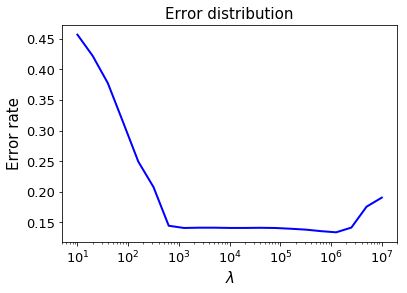

In [91]:
plt.cla()
plt.plot(lmbdas,np.mean(overall_err,0),'b',linewidth=2)
plt.xscale('log')


plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('Error rate',fontsize=15)
plt.title('Error distribution',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

In [14]:

#lmbdas=10**np.arange(1,5.1,0.5)
lmbda=10**6

trainfile=open('{0}/full/train_features_full.csv'.format(datapath))
testfile=open('{0}/full/test_features_full.csv'.format(datapath))
trainX=[]
trainY=[]
testX=[]
testY=[]
for line in trainfile:
    line=line.split(',')[1:]
    if line[0]=='safe_type':
        continue
    line=[float(k) for k in line]
    trainX.append(line[1:])
    trainY.append(line[0])
trainX=np.array(trainX)[:,:5]
trainY=np.array(trainY)[:,np.newaxis].astype(int)
trainY[trainY==0]=-1
print(trainX.shape,trainY.shape)

for line in testfile:
    line=line.split(',')[1:]
    if line[0]=='safe_type':
        continue
    line=[float(k) for k in line]
    testX.append(line[1:])
    testY.append(line[0])
testX=np.array(testX)[:,:5]
testY=np.array(testY)[:,np.newaxis].astype(int)
testY[testY==0]=-1
print(testX.shape,testY.shape)
    
myw = trainlr(trainX,trainY,lmbda)
ans=sigmoid(np.matmul(testX,myw))
threshold=0.5
ans[ans>=threshold]=1
ans[ans<threshold]=-1
err=np.sum(testY*ans<=0)/float(testY.shape[0])
outfile=open('{0}/full/result_lr.csv'.format(datapath),'w')

testY[testY==-1]=0
ans[ans==-1]=0
for i in range(0,testY.shape[0]):
    outfile.write('{0},{1}\n'.format(int(testY[i][0]),ans[i][0]))
print(err)
outfile.close()

((24000, 5), (24000, 1))
((6000, 5), (6000, 1))


/home/mingchen/Research/.venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.136


In [15]:
infile=open('{0}/full/result_lr.csv'.format(datapath))
count=0
score=0
for line in infile:
    count+=1
    line=line.replace('\n','').split(',')
    line=np.array([float(k) for k in line]).astype(int)
    if line[0]==line[1]:
        score+=1
    score-=(line[1]-line[0])*line[1]
print(float(score)/count)
infile.close()

0.8355
